In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('arctic_ice_extent.csv')
df.head()

,year,extent
0,1979,6.903
1,1980,7.544
2,1981,6.903
3,1982,7.166
4,1983,7.221


Text(0, 0.5, 'extent')

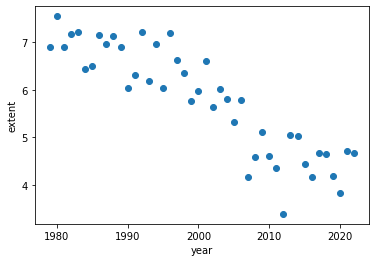

In [ ]:
plt.scatter(df.year,df['extent'])
plt.xlabel('year')
plt.ylabel('extent')

In [ ]:
#Ejecutamos nuestro modelo KMeans
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [ ]:

y_pred = km.fit_predict(df[['year','extent']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
df['Cluster'] = y_pred
df

,year,extent,Cluster
0,1979,6.903,1
1,1980,7.544,1
2,1981,6.903,1
3,1982,7.166,1
4,1983,7.221,1
5,1984,6.426,1
6,1985,6.491,1
7,1986,7.157,1
8,1987,6.963,1
9,1988,7.126,1


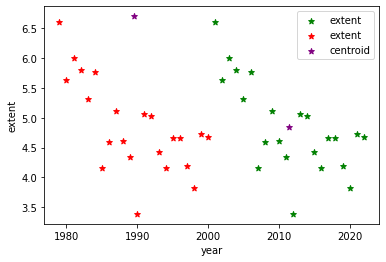

In [ ]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
plt.scatter(df1.year,df1['extent'],color= 'green',marker = '*',label='extent')
plt.scatter(df2.year,df1['extent'],color= 'red',marker = '*',label='extent')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple', marker='*',label='centroid')
plt.xlabel('year')
plt.ylabel('extent')
plt.legend()

In [ ]:
df.groupby('Cluster').mean()

,year,extent
Cluster,,
0,2011.5,4.851955
1,1989.5,6.701409


In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['extent']])
df['extent'] = scaler.transform(df[['extent']])

In [ ]:
df.head()

,year,extent,Cluster
0,1979,0.845802,1
1,1980,1.000000,1
2,1981,0.845802,1
3,1982,0.909069,1
4,1983,0.922300,1


In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['year','extent']])
  sse.append(km.inertia_)

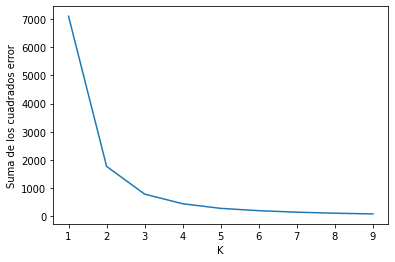

In [ ]:
plt.xlabel('K')
plt.ylabel('Suma de los cuadrados error')
plt.plot(k_rng,sse)